In [1]:
## Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px
## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve

In [7]:
df = pd.read_csv('/content/SCfulldata.csv', encoding='ISO-8859-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Supplier Lead Time Of Delay,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,...,COGS,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,Transfer,6,4,2,-107.96,161.87,Late Delivery,1,76,Women'S Clothing,...,324.2729,Southeast Asia,Processing,1363,76,Summer Dresses,215.82,0,2/6/2018 22:14,Standard Class
1,Debit,6,4,2,17.09,194.24,Late Delivery,1,76,Women'S Clothing,...,198.3384,Eastern Asia,Complete,1363,76,Summer Dresses,215.82,0,2/6/2018 18:44,Standard Class
2,Debit,6,4,2,65.02,179.13,Late Delivery,1,76,Women'S Clothing,...,151.3332,South Asia,Complete,1363,76,Summer Dresses,215.82,0,2/6/2018 16:59,Standard Class
3,Transfer,6,2,4,-363.23,213.66,Late Delivery,1,76,Women'S Clothing,...,579.0420,Southeast Asia,Pending,1363,76,Summer Dresses,215.82,0,2/6/2018 15:14,Second Class
4,Payment,6,4,2,67.30,203.95,Late Delivery,1,76,Women'S Clothing,...,148.5165,South Asia,Pending_Payment,1363,76,Summer Dresses,215.82,0,2/6/2018 13:29,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,Payment,2,4,-2,117.17,377.96,Advance Shipping,0,18,Men'S Footwear,...,282.7924,South America,Payment_Review,191,18,Nike Men'S Free 5.0+ Running Shoe,99.99,0,1/3/2015 3:30,Standard Class
180514,Payment,2,4,-2,56.99,151.96,Advance Shipping,0,26,Girls' Apparel,...,102.2152,South America,Payment_Review,627,26,Under Armour Girls' Toddler Spine Surge Runni,39.99,0,1/3/2015 3:30,Standard Class
180515,Payment,2,4,-2,62.54,227.41,Advance Shipping,0,46,Indoor/Outdoor Games,...,186.2252,South America,Payment_Review,1014,46,O'Brien Men'S Neoprene Life Vest,49.98,0,1/3/2015 3:30,Standard Class
180516,Payment,2,4,-2,19.50,41.48,Advance Shipping,0,46,Indoor/Outdoor Games,...,30.4844,South America,Payment_Review,1014,46,O'Brien Men'S Neoprene Life Vest,49.98,0,1/3/2015 3:30,Standard Class


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180518 entries, 0 to 180517
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180518 non-null  object 
 1   Days for shipping (real)       180518 non-null  int64  
 2   Days for shipment (scheduled)  180518 non-null  int64  
 3   Supplier Lead Time Of Delay    180518 non-null  int64  
 4   Benefit per order              180518 non-null  float64
 5   Sales per customer             180518 non-null  float64
 6   Delivery Status                180518 non-null  object 
 7   Late_delivery_risk             180518 non-null  int64  
 8   Category Id                    180518 non-null  int64  
 9   Category Name                  180518 non-null  object 
 10  Customer City                  180518 non-null  object 
 11  Customer Country               180518 non-null  object 
 12  Customer Id                   

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Supplier Lead Time Of Delay      0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Full Name               0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Latitude                         0
Longitude                        0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order ID                         0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Item Cardprod 

In [15]:
train_df = df.copy()
train_df.dtypes
label_encoder = LabelEncoder()
columns_to_encode = ['Type'
 , 'Category Name'
 , 'Customer City'
 , 'Customer Country'
 , 'Customer Segment'
 , 'Customer State'
 ,'Delivery Status'
 , 'Department Name'
 , 'Market'
 , 'Order City'
 , 'Order Country'
 , 'Order Region'
 , 'Order Status'
 , 'Product Name', 'shipping date (DateOrders)',
 , 'Shipping Mode']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [14]:
train_df.dtypes

,0
Type,int64
Days for shipping (real),int64
Days for shipment (scheduled),int64
Supplier Lead Time Of Delay,int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,int64
Late_delivery_risk,int64
Category Id,int64
Category Name,int64


In [16]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['order date (DateOrders)']

,order date (DateOrders)
0,2018-01-31 22:14:00
1,2018-01-31 18:44:00
2,2018-01-31 16:59:00
3,2018-01-31 15:14:00
4,2018-01-31 13:29:00
...,...
180513,2015-01-01 03:30:00
180514,2015-01-01 03:30:00
180515,2015-01-01 03:30:00
180516,2015-01-01 03:30:00


In [17]:
#Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [18]:
df = df.drop(['order date (DateOrders)'], axis=1)

In [19]:
#Fill Null in Customer Zipcode
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [20]:
#Days of Late
df['late_days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['late_days']

,late_days
0,2
1,2
2,2
3,4
4,2
...,...
180513,-2
180514,-2
180515,-2
180516,-2


<Axes: ylabel='count'>

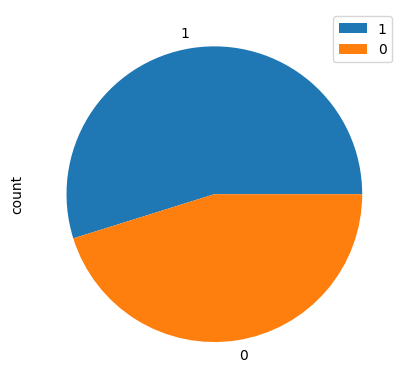

In [21]:
#Check proportion of Late Delivery Risk
df['Late_delivery_risk'].value_counts().plot.pie(legend = ["0", "1"])

In [22]:
train_df = df.copy()
train_df.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Supplier Lead Time Of Delay,int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object


In [38]:
#Encode all Categorical Object Variables
label_encoder = LabelEncoder()
columns_to_encode = ['Type'
 , 'Category Name'
 , 'Customer City'
 , 'Customer Country'
 , 'Customer Segment'
 , 'Customer State'
 ,'Delivery Status'
 , 'Department Name'
 , 'Market'
 , 'Order City'
 , 'Order Country'
 , 'Order Region'
 , 'Order Status'
 , 'Product Name'
 , 'Shipping Mode', 'shipping date (DateOrders)']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [25]:
#Choosing predictors and outcome
#Drop "Days for shipping (real)", "Days for shipment (scheduled)" as already created late_days column
train_df.drop(["Days for shipping (real)", "Days for shipment (scheduled)", "Delivery Status"],axis=1)

,Type,Supplier Lead Time Of Delay,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_yr,order_month,order_day,order_hour,late_days
0,3,2,-107.96,161.87,1,76,37,65,0,20753,...,87,215.82,0,2/6/2018 22:14,3,2018,1,2,22,2
1,1,2,17.09,194.24,1,76,37,11,1,20743,...,87,215.82,0,2/6/2018 18:44,3,2018,1,2,18,2
2,1,2,65.02,179.13,1,76,37,65,0,20738,...,87,215.82,0,2/6/2018 16:59,3,2018,1,2,16,2
3,3,4,-363.23,213.66,1,76,37,65,0,20733,...,87,215.82,0,2/6/2018 15:14,2,2018,1,2,15,4
4,2,2,67.30,203.95,1,76,37,93,1,20728,...,87,215.82,0,2/6/2018 13:29,3,2018,1,2,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,2,-2,117.17,377.96,0,18,27,65,0,918,...,67,99.99,0,1/3/2015 3:30,3,2015,1,3,3,-2
180514,2,-2,56.99,151.96,0,26,17,65,0,918,...,108,39.99,0,1/3/2015 3:30,3,2015,1,3,3,-2
180515,2,-2,62.54,227.41,0,46,25,65,0,918,...,73,49.98,0,1/3/2015 3:30,3,2015,1,3,3,-2
180516,2,-2,19.50,41.48,0,46,25,65,0,918,...,73,49.98,0,1/3/2015 3:30,3,2015,1,3,3,-2


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180518 entries, 0 to 180517
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180518 non-null  int64  
 1   Days for shipping (real)       180518 non-null  int64  
 2   Days for shipment (scheduled)  180518 non-null  int64  
 3   Supplier Lead Time Of Delay    180518 non-null  int64  
 4   Benefit per order              180518 non-null  float64
 5   Sales per customer             180518 non-null  float64
 6   Delivery Status                180518 non-null  int64  
 7   Late_delivery_risk             180518 non-null  int64  
 8   Category Id                    180518 non-null  int64  
 9   Category Name                  180518 non-null  int64  
 10  Customer City                  180518 non-null  int64  
 11  Customer Country               180518 non-null  int64  
 12  Customer Id                   

In [36]:
train_df.drop(["shipping date (DateOrders)", "Days for shipment (scheduled)", "Delivery Status"],axis=1)

,Type,Days for shipping (real),Supplier Lead Time Of Delay,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,order_yr,order_month,order_day,order_hour,late_days
0,3,6,2,-107.96,161.87,1,76,37,65,0,...,76,87,215.82,0,3,2018,1,2,22,2
1,1,6,2,17.09,194.24,1,76,37,11,1,...,76,87,215.82,0,3,2018,1,2,18,2
2,1,6,2,65.02,179.13,1,76,37,65,0,...,76,87,215.82,0,3,2018,1,2,16,2
3,3,6,4,-363.23,213.66,1,76,37,65,0,...,76,87,215.82,0,2,2018,1,2,15,4
4,2,6,2,67.30,203.95,1,76,37,93,1,...,76,87,215.82,0,3,2018,1,2,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,2,2,-2,117.17,377.96,0,18,27,65,0,...,18,67,99.99,0,3,2015,1,3,3,-2
180514,2,2,-2,56.99,151.96,0,26,17,65,0,...,26,108,39.99,0,3,2015,1,3,3,-2
180515,2,2,-2,62.54,227.41,0,46,25,65,0,...,46,73,49.98,0,3,2015,1,3,3,-2
180516,2,2,-2,19.50,41.48,0,46,25,65,0,...,46,73,49.98,0,3,2015,1,3,3,-2


In [40]:
train_df.drop(["Customer Full Name", "Customer Street"],axis=1)

,Type,Days for shipping (real),Days for shipment (scheduled),Supplier Lead Time Of Delay,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_yr,order_month,order_day,order_hour,late_days
0,3,6,4,2,-107.96,161.87,1,1,76,37,...,87,215.82,0,27721,3,2018,1,2,22,2
1,1,6,4,2,17.09,194.24,1,1,76,37,...,87,215.82,0,27719,3,2018,1,2,18,2
2,1,6,4,2,65.02,179.13,1,1,76,37,...,87,215.82,0,27718,3,2018,1,2,16,2
3,3,6,2,4,-363.23,213.66,1,1,76,37,...,87,215.82,0,27717,2,2018,1,2,15,4
4,2,6,4,2,67.30,203.95,1,1,76,37,...,87,215.82,0,27716,3,2018,1,2,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,2,2,4,-2,117.17,377.96,0,0,18,27,...,67,99.99,0,5014,3,2015,1,3,3,-2
180514,2,2,4,-2,56.99,151.96,0,0,26,17,...,108,39.99,0,5014,3,2015,1,3,3,-2
180515,2,2,4,-2,62.54,227.41,0,0,46,25,...,73,49.98,0,5014,3,2015,1,3,3,-2
180516,2,2,4,-2,19.50,41.48,0,0,46,25,...,73,49.98,0,5014,3,2015,1,3,3,-2


In [42]:
train_df.drop(["Customer Full Name", "Customer Street"],axis=1)

,Type,Days for shipping (real),Days for shipment (scheduled),Supplier Lead Time Of Delay,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_yr,order_month,order_day,order_hour,late_days
0,3,6,4,2,-107.96,161.87,1,1,76,37,...,87,215.82,0,27721,3,2018,1,2,22,2
1,1,6,4,2,17.09,194.24,1,1,76,37,...,87,215.82,0,27719,3,2018,1,2,18,2
2,1,6,4,2,65.02,179.13,1,1,76,37,...,87,215.82,0,27718,3,2018,1,2,16,2
3,3,6,2,4,-363.23,213.66,1,1,76,37,...,87,215.82,0,27717,2,2018,1,2,15,4
4,2,6,4,2,67.30,203.95,1,1,76,37,...,87,215.82,0,27716,3,2018,1,2,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,2,2,4,-2,117.17,377.96,0,0,18,27,...,67,99.99,0,5014,3,2015,1,3,3,-2
180514,2,2,4,-2,56.99,151.96,0,0,26,17,...,108,39.99,0,5014,3,2015,1,3,3,-2
180515,2,2,4,-2,62.54,227.41,0,0,46,25,...,73,49.98,0,5014,3,2015,1,3,3,-2
180516,2,2,4,-2,19.50,41.48,0,0,46,25,...,73,49.98,0,5014,3,2015,1,3,3,-2


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180518 entries, 0 to 180517
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180518 non-null  int64  
 1   Days for shipping (real)       180518 non-null  int64  
 2   Days for shipment (scheduled)  180518 non-null  int64  
 3   Supplier Lead Time Of Delay    180518 non-null  int64  
 4   Benefit per order              180518 non-null  float64
 5   Sales per customer             180518 non-null  float64
 6   Delivery Status                180518 non-null  int64  
 7   Late_delivery_risk             180518 non-null  int64  
 8   Category Id                    180518 non-null  int64  
 9   Category Name                  180518 non-null  int64  
 10  Customer City                  180518 non-null  int64  
 11  Customer Country               180518 non-null  int64  
 12  Customer Id                   

In [44]:

# Drop object columns
object_columns = train_df.select_dtypes(include=['object']).columns
train_df = train_df.drop(columns=object_columns)
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180518 entries, 0 to 180517
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180518 non-null  int64  
 1   Days for shipping (real)       180518 non-null  int64  
 2   Days for shipment (scheduled)  180518 non-null  int64  
 3   Supplier Lead Time Of Delay    180518 non-null  int64  
 4   Benefit per order              180518 non-null  float64
 5   Sales per customer             180518 non-null  float64
 6   Delivery Status                180518 non-null  int64  
 7   Late_delivery_risk             180518 non-null  int64  
 8   Category Id                    180518 non-null  int64  
 9   Category Name                  180518 non-null  int64  
 10  Customer City                  180518 non-null  int64  
 11  Customer Country               180518 non-null  int64  
 12  Customer Id                   

##Model 1: KNN



In [48]:
X = train_df.drop('Late_delivery_risk', axis=1)
y = train_df['Late_delivery_risk']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

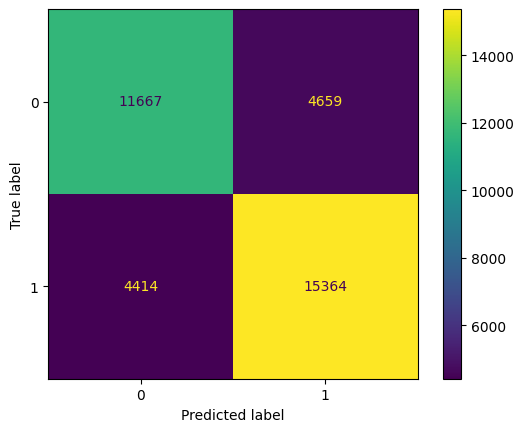

In [56]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

##Model 2: Random Forest


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16326
           1       1.00      1.00      1.00     19778

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



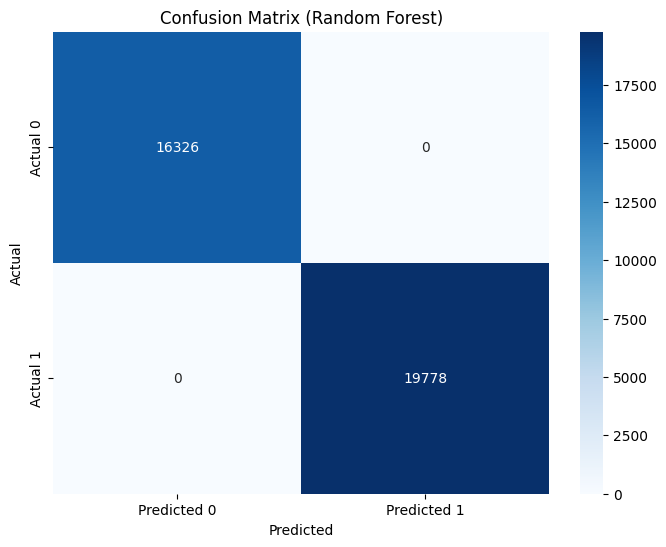

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()
